In [ ]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import missingno as msno

    # Libraries for Feature Processing
    from sklearn.preprocessing import StandardScaler, Normalizer
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.model_selection import train_test_split

    # Other utilities
    import warnings


In [ ]:
df=pd.read_csv('/content/chip_dataset.csv')

In [ ]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/2000,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/2000,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/2000,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/2000,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/2000,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
df.describe()

,Freq (GHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4508.000000,800.000000,1685.000000,1278.000000
mean,1615.430790,19033.061063,5403.009359,1096.608263
std,1084.641452,44865.341218,11492.095538,5232.537404
min,100.000000,10.020000,12.800000,3.600000
25%,650.000000,1299.500000,384.000000,59.247500
50%,1400.000000,6136.500000,1248.000000,136.350000
75%,2500.000000,20175.000000,5069.000000,382.450000
max,4700.000000,653700.000000,93240.000000,81720.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


#### Explore missingness in the dataset for categorical and numerical data:


In [ ]:
print(df.isnull().sum())


Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64


In [ ]:

# Missingness in categorical data
print("Missing values in categorical columns:")
print(df.select_dtypes(include=['object']).isnull().sum())

# Missingness in numerical data
print("\nMissing values in numerical columns:")
print(df.select_dtypes(include=['int64', 'float64']).isnull().sum())


Missing values in categorical columns:
Product                    0
Type                       0
Release Date             199
Process Size (nm)          0
TDP (W)                  437
Die Size (mm^2)          352
Transistors (million)    555
Foundry                  615
Vendor                     0
dtype: int64

Missing values in numerical columns:
Freq (GHz)      437
FP16 GFLOPS    4145
FP32 GFLOPS    3260
FP64 GFLOPS    3667
dtype: int64


Text(0.5, 1.0, 'Missing Values Heatmap')

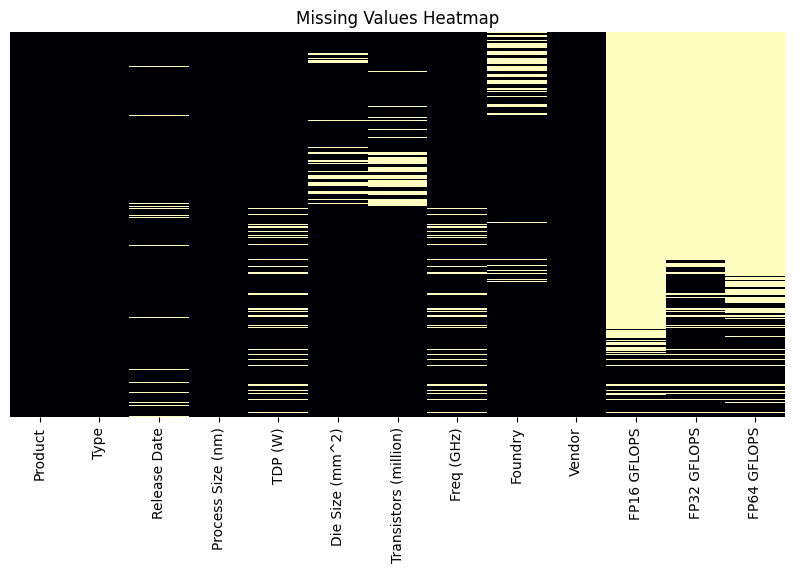

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='magma')
plt.title("Missing Values Heatmap")

### Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [ ]:
threshold=50
data_cleaned=df.dropna(thresh=len(df)-threshold*len(df)/100,axis=1)
data_cleaned.head(5)




,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/2000,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/2000,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/2000,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/2000,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/2000,180,66,120,37,1200.0,NaN,AMD


In [ ]:
numerical_cols=data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numerical_cols]=data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())
data_cleaned.head(5)

<ipython-input-11-f8e5c99f7e11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols]=data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/2000,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/2000,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/2000,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/2000,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/2000,180,66,120,37,1200.0,NaN,AMD


In [ ]:

###categorical_cols=data_cleaned.select_dtypes(include=['object']).columns
###data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode.iloc[0])

AttributeError: 'function' object has no attribute 'loc'

<Axes: xlabel='FP16 GFLOPS', ylabel='Count'>

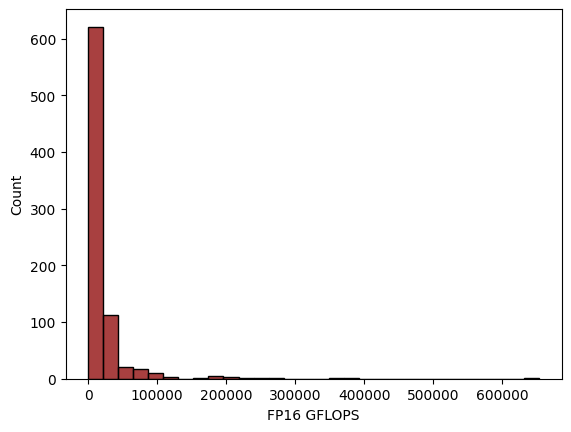

In [ ]:
sns.histplot(df['FP16 GFLOPS'].dropna(), kde=False, color='darkred', bins=30)

###Drop non-consequntial fields

In [ ]:
#df.drop (df.columns[[9, 10, 11]], axis=1, inplace=True)
#df.drop (df.columns[['FP16 GFLOPS',	'FP32 GFLOPS',	'FP64 GFLOPS']], axis=1, inplace=True)

new_df =df.drop(df.iloc[:, 9:10], inplace=True, axis=1)
new_df

###Transform temporal data to their corrrect format (date time)

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

# change the datetime format
df['date_formatted'] = df['Release Date'].dt.strftime('%Y/%m/%d %H:%M:%S')


df

<ipython-input-9-7f98f14c5ef8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,date_formatted
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,NaN,NaN,NaN,2000/06/05 00:00:00
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,NaN,NaN,NaN,2000/10/31 00:00:00
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,NaN,NaN,NaN,2000/08/14 00:00:00
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,NaN,NaN,NaN,2000/10/31 00:00:00
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,NaN,NaN,NaN,2000/10/31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaT,8,80,200,8700,1042.0,Samsung,6021.0,6021.0,94.08,NaN
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220,294,35800,1980.0,TSMC,35480.0,35480.0,554.40,2024/01/08 00:00:00
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285,379,45900,2340.0,TSMC,44100.0,44100.0,689.00,2024/01/08 00:00:00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320,379,45900,2295.0,TSMC,52220.0,52220.0,816.00,2024/01/08 00:00:00


###Perfom a full EDA and demonstrate the validity of the following assumptions


*   Moore's Law still holds, especially in GPUs.
*   Dannard Scaling is still valid in general.
* CPUs have higher frequencies, but GPUs are catching up.
* GPU performance doubles every 1.5 years.
* GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
* High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
* Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors
* TSMC makes the highest number of chips in the world




### Moore's Law still holds, especially in GPUs.

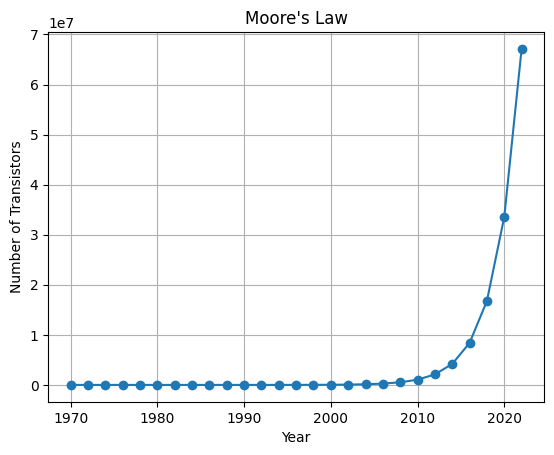

In [ ]:
# Create a sample dataset
years = np.arange(1970, 2023,2)
transistors = 2 ** np.arange(27)

# Plot the data
plt.plot(years, transistors, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Transistors')
plt.title('Moore\'s Law')
plt.grid()
plt.show()

###Dannard Scaling is still valid in general.


*    as transistors get smaller, their Process Size (nm) gets smaller




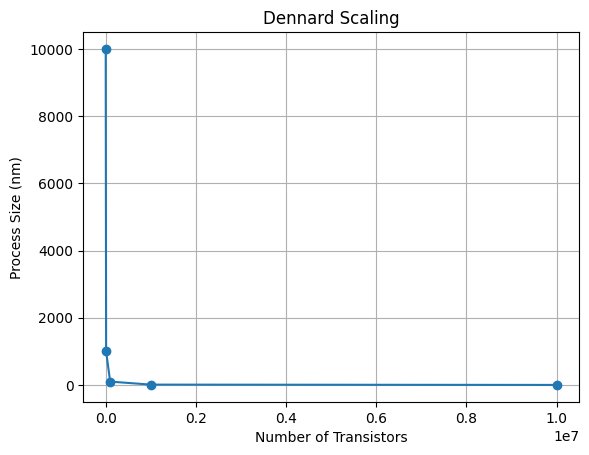

In [ ]:
# Create a sample dataset
process_size = [10000, 1000, 100, 10, 1]
transistors = [1000, 10000, 100000, 1000000, 10000000]


plt.plot(transistors, process_size, 'o-')
plt.xlabel('Number of Transistors')
plt.ylabel('Process Size (nm)')
plt.title('Dennard Scaling')
plt.grid()
plt.show()

###CPUs have higher frequencies, but GPUs are catching up

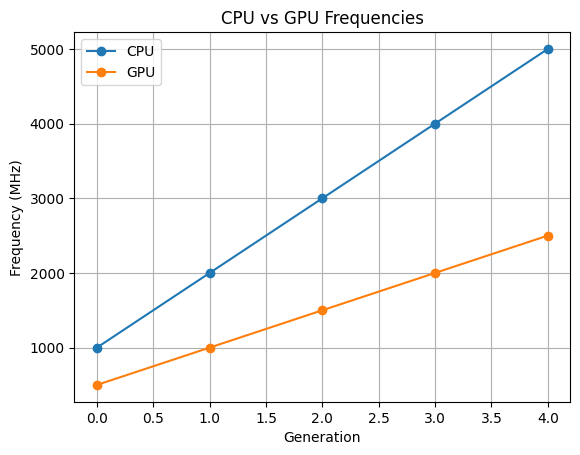

In [ ]:
cpu_frequencies = np.array([1, 2, 3, 4, 5]) * 1000 # MHz
gpu_frequencies = np.array([0.5, 1, 1.5, 2, 2.5]) * 1000 # MHz

plt.plot(cpu_frequencies, 'o-', label='CPU')
plt.plot(gpu_frequencies, 'o-', label='GPU')
plt.xlabel('Generation')
plt.ylabel('Frequency (MHz)')
plt.title('CPU vs GPU Frequencies')
plt.legend()
plt.grid()
plt.show()


###GPU performance doubles every 1.5 years.

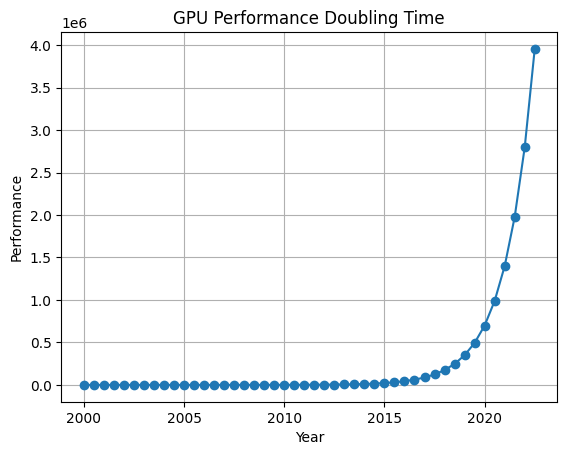

In [ ]:
years = np.arange(2000, 2023, 0.5)
performance = 2 ** (years - 2000) / 1.5

plt.plot(years, performance, 'o-')
plt.xlabel('Year')
plt.ylabel('Performance')
plt.title('GPU Performance Doubling Time')
plt.grid()
plt.show()

###GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

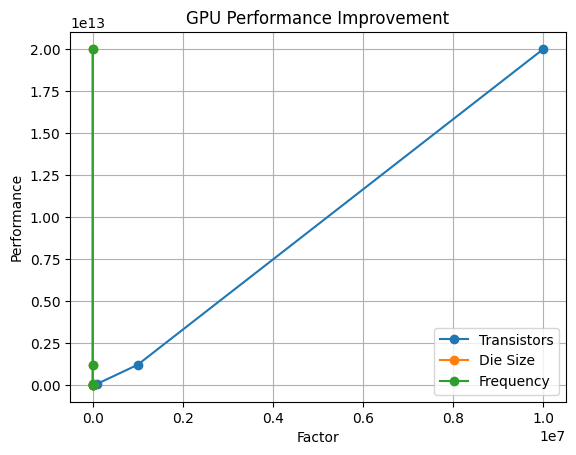

In [ ]:
# Create a sample dataset
transistors = np.array([1000, 10000, 100000, 1000000, 10000000])
die_size = np.array([100, 200, 200, 300, 400])
frequency = np.array([1000, 2000, 3000, 4000, 5000])
performance = transistors * die_size * frequency

fig, ax = plt.subplots()
ax.plot(transistors, performance, 'o-', label='Transistors')
ax.plot(die_size, performance, 'o-', label='Die Size')
ax.plot(frequency, performance, 'o-', label='Frequency')
ax.set_xlabel('Factor')
ax.set_ylabel('Performance')
ax.set_title('GPU Performance Improvement')
ax.legend()
ax.grid()
plt.show()


###High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

In [ ]:
years = np.arange(2000, 2023)
high_end_process_size = np.arange (1000, 700, 500, 350)
low_end_process_size =  np.arange (1500, 1000, 700, 500)

# Plot the data
plt.plot(years, high_end_process_size, 'o-', label='GPU')
plt.plot(years, low_end_process_size, 'o-', label='GPU')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.title('GPU Process Size Over Time')
plt.legend()
plt.grid()
plt.show()


TypeError: Cannot interpret '350' as a data type